In [1]:
%cd /content/drive/MyDrive/Data Mining/7. Random Forest and Driver Importance

/content/drive/MyDrive/Data Mining/7. Random Forest and Driver Importance


In [5]:
import pandas as pd

In [7]:
dataset = pd.read_csv('bank-full.csv', sep = ';')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
#Data Prep
dataset = pd.get_dummies(dataset, drop_first = True)
dataset.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [11]:
#Isolate X and Y

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,False,True,False,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [12]:
#split into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1502, stratify = y)

X_train.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
6276,31,66,27,121,1,-1,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2876,48,427,14,201,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
39212,33,139,18,732,2,291,5,True,False,False,...,False,False,False,True,False,False,False,False,False,False
40781,23,0,10,213,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7551,37,1255,30,224,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [13]:
#RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300, random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

In [14]:
#Predictions
predictions = model.predict(X_test)
predictions[:20]

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [15]:
#checking dataset balance
y_train.mean()

0.11698186241981863

In [17]:
#Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.92      0.97      0.95      7985
        True       0.67      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.90      9043



<Axes: >

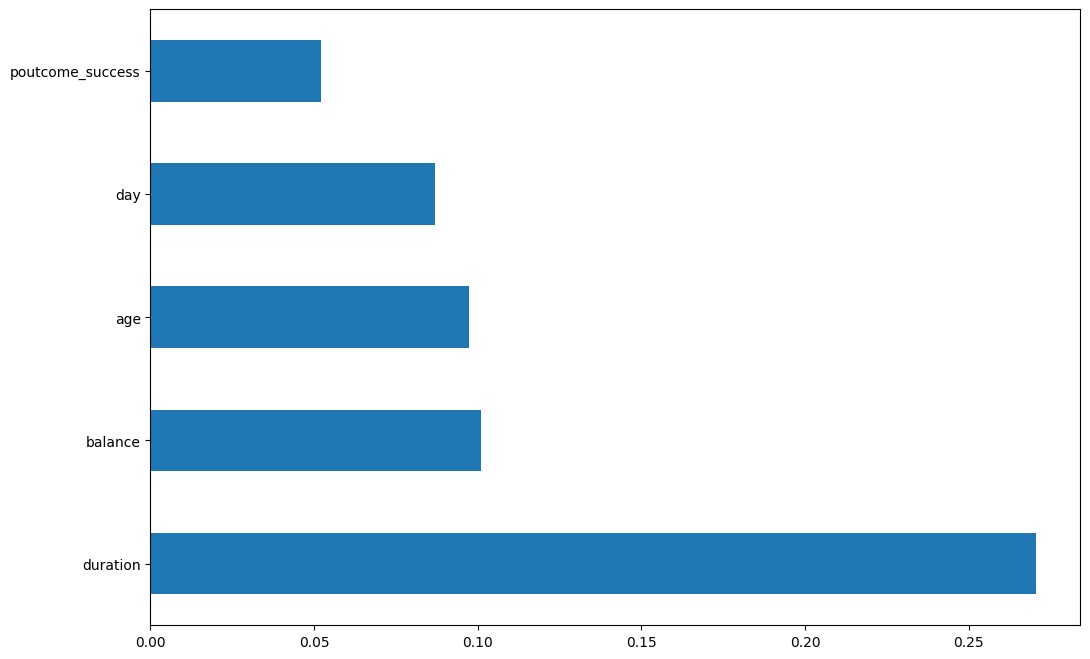

In [20]:
#Feature Importance

importance = pd.Series(model.feature_importances_, index = X_train.columns.values)

importance.nlargest(5).plot(kind = 'barh',figsize=(12,8))